In [3]:
import sympy
from sympy import S
from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j
import numpy as np
import scipy.constants as sc

I = 2*.11/(np.pi*(29.3e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
m=2.2085e-25
w_s = 2*np.pi*5e6
z0 = sympy.sqrt(sc.hbar/(4*m*w_s))

gam1ps = 2*np.pi*15.1e6
gam2ps = 2*np.pi*18.8e6
gam1pd1 = 2*np.pi*5.3e6
gam2pd1 = 2*np.pi*.7e6
gam2pd2 = 2*np.pi*5.9e6

###i = |F=0, mf=0, L=0> ###
si = S(1)/2
fi = 0
mfi = 0
ji = S(1)/2
li = 0
wi = 2*np.pi*(9.925e9)
q= 1

freq = np.arange(120,750)
rr = np.zeros(len(freq));
sr = np.zeros(len(freq));sqge = np.zeros(len(freq)); tqge = np.zeros(len(freq))
ozsr = np.zeros(len(freq)); ozsqge= np.zeros(len(freq)); oztqge = np.zeros(len(freq))
w3sr = np.zeros(len(freq)); w3sqge= np.zeros(len(freq)); w3tqge = np.zeros(len(freq))

print(np.where(freq==563))

(array([443], dtype=int64),)


In [4]:
for i in range(len(freq)):
    w = 2*np.pi*(freq[i]*1e12)
    eta = sympy.sqrt(2)*w*z0/sc.c


    ##--------------------- f = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sf = S(1)/2
    ff = 1
    mff = -1
    jf = S(1)/2
    lf = 0

    wf = 2*np.pi*(0)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1ps
    gli = gam1ps


    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1ps
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1ps
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)
    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)

    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61)**2
    g4 = (t12+t42)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum10 = con*(g1+g2+g3+g4+g5+g6)


    ##--------------------- f = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sf = S(1)/2
    ff = 1
    mff = 0
    jf = S(1)/2
    lf = 0

    wf = 2*np.pi*(0)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1ps
    gli = gam1ps


    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1ps
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1ps
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)
    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)

    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61+t12+t42)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum11 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sf = S(1)/2
    ff = 1
    mff = 1
    jf = S(1)/2
    lf = 0

    wf = 2*np.pi*(0)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1ps
    gli = gam1ps


    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1ps
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1ps
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)
    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2ps
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)

    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61+t22+t52)**2
    g4 = (t12+t42)**2
    g6 = (t32+t62)**2

    fsum12 = con*(g1+g2+g3+g4+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=1> -----------------------------##
    sf = S(1)/2
    ff = 1
    mff = -1
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61)**2
    g4 = (t12+t42)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum210 = con*(g1+g2+g3+g4+g5+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=1> -----------------------------##
    sf = S(1)/2
    ff = 1
    mff = 0
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61+t12+t42)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum211 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=1> -----------------------------##
    sf = S(1)/2
    ff = 1
    mff = 1
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61+t22+t52)**2
    g4 = (t12+t42)**2
    g6 = (t32+t62)**2

    fsum212 = con*(g1+g2+g3+g4+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=1> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = -2
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61)**2
    g4 = (t12+t42)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum220 = con*(g1+g2+g3+g4+g5+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=1> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = -1
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61)**2
    g4 = (t12+t42)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum221 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=1> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = 0
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61+t12+t42)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum222 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=1> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = 1
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x
    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61+t22+t52)**2
    g5 = (t22+t52)**2
    g6 = (t32+t62)**2

    fsum223 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=1, J=3/2, L=2, mf=2> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = 2
    jf = S(3)/2
    lf = 2

    wf = 2*np.pi*(146.11656100000005e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x
    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=1/2, L=0, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)

    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(1)/2
    ll = 1
    wl = 2*np.pi*(607.429890e12-1.815e9)


    glf = gam1pd1
    gli = gam1ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x
    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x
    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t41 = mu11*mu12/(wl-w)
    t42 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t51 = mu11*mu12/(wl-w)
    t52 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd1
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x
    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x
    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t61 = mu11*mu12/(wl-w)
    t62 = mu21*mu22/(wl+w-wf)


    g1 = (t11+t41)**2
    g2 = (t21+t51)**2
    g3 = (t31+t61+t32+t62)**2
    g5 = (t22+t52)**2
    g6 = (t12+t42)**2

    fsum224 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=2, J=5/2, L=2, mf=2> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = -2
    jf = S(5)/2
    lf = 2

    wf = 2*np.pi*(170.1432792281e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)


    g1 = (t11)**2
    g2 = (t21)**2
    g3 = (t31+t32)**2
    g5 = (t22)**2
    g6 = (t12)**2

    fsum320 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=2, J=5/2, L=2, mf=2> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = -1
    jf = S(5)/2
    lf = 2

    wf = 2*np.pi*(170.1432792281e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*wl**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)


    g1 = (t11)**2
    g2 = (t21)**2
    g3 = (t31+t32)**2
    g5 = (t22)**2
    g6 = (t12)**2

    fsum321 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=2, J=5/2, L=2, mf=2> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = 0
    jf = S(5)/2
    lf = 2

    wf = 2*np.pi*(170.1732188978e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x
    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)


    g1 = (t11)**2
    g2 = (t21)**2
    g3 = (t31+t12)**2
    g5 = (t22)**2
    g6 = (t32)**2
    fsum322 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=2, J=5/2, L=2, mf=2> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = 1
    jf = S(5)/2
    lf = 2

    wf = 2*np.pi*(170.1732188978e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x
    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)


    g1 = (t11)**2
    g2 = (t21)**2
    g3 = (t31+t22)**2
    g5 = (t22)**2
    g6 = (t32)**2

    fsum323 = con*(g1+g2+g3+g5+g6)

    ##--------------------- f = |F=2, J=5/2, L=2, mf=2> -----------------------------##
    sf = S(1)/2
    ff = 2
    mff = 2
    jf = S(5)/2
    lf = 2

    wf = 2*np.pi*(170.1732188978e12)
    con = (E**2*(w-wf)**3)/(12*np.pi*sc.c**3*sc.epsilon_0*sc.hbar**3)

    ##--------------------- l = |F=1, J=1/2, L=0, mf=-1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = -1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)

    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t11 = mu11*mu12/(wl-w)
    t12 = mu21*mu22/(wl+w-wf)


    ##--------------------- l = |F=1, J=3/2, L=1, mf=0> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 0
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)

    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x


    t21 = mu11*mu12/(wl-w)
    t22 = mu21*mu22/(wl+w-wf)

    ##--------------------- l = |F=1, J=3/2, L=1, mf=1> -----------------------------##
    sl = S(1)/2
    fl = 1
    mfl = 1
    jl = S(3)/2
    ll = 1
    wl = 2*np.pi*(658.115271e12+625e6)


    glf = gam2pd2
    gli = gam2ps

    ##l --> f e_sc ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  mfl-mff , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu11 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x
    #i -- > l e_q ##
    c1 = wigner_3j(fl, 1, fi, -mfl, q , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu12 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x
    ##l --> f e_q ##

    c1 = wigner_3j(fl, 1, ff, -mfl,  -q , mff)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,ff,jf,1)*sympy.sqrt(2*ff+1)*(-1)**(jl+S(1)/2+ff+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu21 = np.sqrt(glf*3*sc.c**2/(4*a*(wl-wf)**3))*x

    #i -- > l e_sc ##
    c1 = wigner_3j(fl, 1, fi, -mfl, mfl-mfi , mfi)*(-1)**(fl-mfl)*sympy.sqrt(2*fl+1)
    c2 = wigner_6j(jl,fl,S(1)/2,fi,ji,1)*sympy.sqrt(2*fi+1)*(-1)**(jl+S(1)/2+fi+1)
    x = c1*c2*sympy.sqrt(2*jl+1)
    mu22 = np.sqrt(gli*3*sc.c**2/(4*a*wl**3))*x

    t31 = mu11*mu12/(wl-w)
    t32 = mu21*mu22/(wl+w-wf)


    g1 = (t11)**2
    g2 = (t21)**2
    g3 = (t31+t32)**2
    g5 = (t22)**2
    g6 = (t12)**2

    fsum324 = con*(g1+g2+g3+g5+g6)

    sr[i] = fsum10+fsum11+fsum12+fsum210+fsum211+fsum212+fsum220+fsum221+fsum222+fsum223+fsum224+fsum320+fsum321+fsum322+fsum323+fsum324

    w32 = 2*np.pi*658.118e12
    w12 = 2*np.pi*607.429e12
    wf = w32-w12

    gam32 = 2*np.pi*18.8e6
    gam12 = 2*np.pi*15.1e6
    gam = 2*np.pi*20.1e6
    d = w-w12

    g= E*np.sqrt(gam32*3*np.pi*sc.c**3*sc.epsilon_0/(w32**3*4*sc.hbar))
    rr[i] = abs(g**2*1/3*(wf/(d*(d-wf))))

    tg1 = np.pi/(2*rr[i])

    sqge[i] = tg1*sr[i]*2
    tg2 = np.pi/(2*rr[i])*(1/eta)
    tqge[i] = tg2*sr[i]*4

    
    ozsr[i] = .27*(gam/3)*(g**2*((1/d**2)+(2/(d-wf)**2)))+(2*gam12/9)*g**2*(wf/(d*(d-wf)))**2
    ozsqge[i] = tg1*ozsr[i]
    oztqge[i] = tg2*ozsr[i]*4

In [24]:
w2051 = 2*np.pi*146.1689215017e12
w1762 = 2*np.pi*170.1432792281e12
w650 = 2*np.pi*461.312345e12
w585 = 2*np.pi*512.00176e12
w614 = 2*np.pi*487.370e12
for i in range(len(freq)):
    w = 2*np.pi*(freq[i]*1e12)
    eta = sympy.sqrt(2)*w*z0/sc.c
    d = w-w12
    g= E*np.sqrt(gam32*3*np.pi*sc.c**3*sc.epsilon_0/(w32**3*4*sc.hbar))
    rr[i] = abs(g**2*1/3*(wf/(d*(d-wf))))
    tg1 = np.pi/(2*rr[i])
    tg2 = np.pi/(2*rr[i])*(1/eta)
    g2 = (gam2ps*3*np.pi*sc.epsilon_0*sc.c**3*E**2)/(4*sc.hbar*w32**3)

#     w3sr[i] = ((w/w12)**3*gam1ps+((w-w2051)/w650)**3*gam1pd1)*g**2/(3*d**2)+((w/w32)**3*gam2ps+((w-w2051)/w585)**3*gam2pd1 + ((w-w1762)/w614)**3*gam2pd2)*(2*g**2/(3*(d-wf)**2))
    w3sr[i] = (w/w32)**3*(2*gam2ps/9)*g2*(wf/(d*(d-wf)))**2+(((w-w2051)/w650)**3*gam1pd1)*g**2/(3*d**2)+(((w-w2051)/w585)**3*gam2pd1 + ((w-w1762)/w614)**3*gam2pd2)*(2*g**2/(3*(d-wf)**2))
    w3sqge[i] = tg1*w3sr[i]*2
    w3tqge[i] = tg2*w3sr[i]*4


0.0306002820756584*sqrt(2)


In [37]:
for i in range(len(freq)):
    w = 2*np.pi*(freq[i]*1e12)
    w0 = 2*np.pi*(564e12)
    eta = sympy.sqrt(2)*w0*z0/sc.c
    w32 = 2*np.pi*658.118e12
    w12 = 2*np.pi*607.429e12
    wf = w32-w12

    gam32 = 2*np.pi*18.8e6
    gam12 = 2*np.pi*15.1e6
    gam = 2*np.pi*20.1e6
    d = w-w12

    g= E*np.sqrt(gam32*3*np.pi*sc.c**3*sc.epsilon_0/(w32**3*4*sc.hbar))
    rr[i] = abs(g**2*1/3*(wf/(d*(d-wf))))

    tg1 = np.pi/(2*rr[i])

    tg2 = np.pi/(2*rr[i])*(1/eta)

    
    ozsr[i] = (.27)*(gam/3)*(g**2*((1/d**2)+(2/(d-wf)**2)))+(2*gam32/9)*g**2*(wf/(d*(d-wf)))**2
    ozsqge[i] = tg1*ozsr[i]*2
    oztqge[i] = tg2*ozsr[i]*4


In [38]:
print('w3', w3sqge[443])
print('oz', ozsqge[443])


wv = np.zeros(len(freq))
for i in range(len(freq)):
    wv[i] = ((sc.c*1e9)/(freq[i]*1e12))

exsr =  0.0015854406871505526 *42.8028825456277
err =  0.00010680207693218261 *42.8028825456277
w=np.pi*2*563e12
w32 = 2*np.pi*658.118e12
w12 = 2*np.pi*607.429e12
wf = w32-w12
eta = sympy.sqrt(2)*w*z0/sc.c

gam32 = 2*np.pi*18.8e6
gam12 = 2*np.pi*15.1e6
gam = 2*np.pi*20.1e6
d = w-w12

g= E*np.sqrt(gam32*3*np.pi*sc.c**3*sc.epsilon_0/(w32**3*4*sc.hbar))
rre = abs(g**2*1/3*(wf/(d*(d-wf))))
tg1 = np.pi/(2*rre)
tg2 = np.pi/(2*rre)*(1/eta)
exsqge = tg1*exsr*2
err1 = tg1*err*2
extqge = tg2*exsr*4
err2=tg2*err*4


print(err)

w3 1.0152638827487893e-06
oz 1.5065974807276992e-06
0.004571436754557306


NameError: name 'cm' is not defined

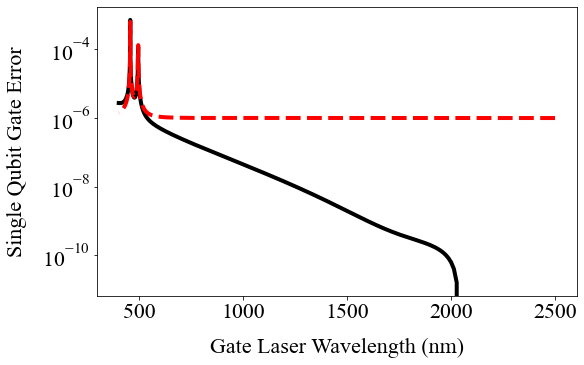

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [8.6, 5.315]
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "Times New Roman"



fig = plt.figure()
ax = fig.gca()
# ax.ticklabel_format(useOffset=False)
# ax.patch.set_facecolor('lightgrey')
# ax.patch.set_alpha(.5)
ax.set_yscale('log')

plt.xlabel("Gate Laser Wavelength (nm)",fontsize=22, labelpad = 15)
plt.ylabel("Single Qubit Gate Error",fontsize=22, labelpad=15)


plt.plot(wv, sqge, color = 'black', label = 'Full Theory', linewidth = 4)
plt.plot(wv, ozsqge, 'r--', label = 'Ozeri Theory', linewidth = 4)
# plt.plot(wv, w3sqge, color = 'blue', label = 'w3 Theory', linewidth = 2)
plt.plot(figsize=(15*cm, 5*cm))

plt.errorbar([532], [exsqge], yerr = [err1], fmt='D', color = 'green', label = 'Experiment')
plt.xlim(1550,400)
plt.ylim(1e-10, .5e-4)
# plt.legend(loc="lower right",fontsize=30)
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# plt.grid(linewidth=2)

plt.tight_layout()
plt.savefig("Z:\Group_Share\Barium\Pictures\DetuningError.pdf", dpi = 2000, transparent=True)

plt.show()


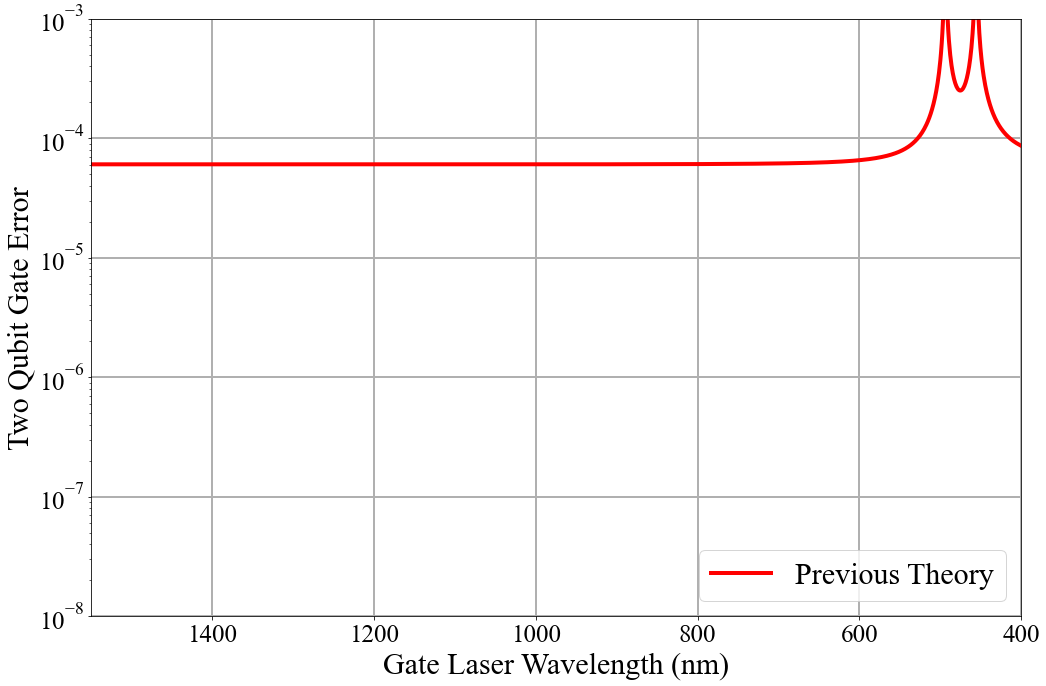

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.optimize import curve_fit
import numpy as np

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fig = plt.figure()
ax = fig.gca()
ax.ticklabel_format(useOffset=False)
# ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(.5)
ax.set_yscale('log')

plt.xlabel("Gate Laser Wavelength (nm)",fontsize=30)
plt.ylabel("Two Qubit Gate Error",fontsize=30)


# plt.plot(wv, tqge, color = 'black', label = 'Full Theory', linewidth = 4)
plt.plot(wv, oztqge, color = 'red', label = 'Previous Theory', linewidth = 4)
# plt.plot(wv, w3tqge, color = 'blue', label = 'w3 Theory', linewidth = 4)

# plt.errorbar([532], [float(extqge)], yerr = [float(err2)], fmt='D', color = 'green', label = 'Experiment')

plt.xlim(1550,400)
plt.ylim(1e-8, 1e-3)
plt.legend(loc="lower right",fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid(linewidth=2)
plt.tight_layout()
plt.show()


In [ ]:
print(sqge[443])
print(ozsqge[443])
print(exsqge)

print(tqge[443])
print(oztqge[443])
print(float(extqge))